# Group Members:<br>
+ Zahra Hoobakht

In [1]:
#%pip install tensorflow
import pandas as pd
import numpy as np

import sys
import missingno as mn
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.special import expit
import copy
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import LabelEncoder
from keras import metrics
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
warnings.filterwarnings("ignore", category=FutureWarning)

## Preparation (4 points total)<br>
### [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

In [2]:
df = pd.read_csv('C://Users/Hedieh/Documents/SMU/ML-Py/lab5/healthcare-dataset-stroke-data.csv') 
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


| Attribute         | Attr. type   | Description                                                  |
| :-----------------: | :-------: | :------------------------------------------------------------ |
| Gender            | Nominal- categorical-one hot encoding |  Sex of individual surveyed. Male or female.                  |
| Age               | Ratio-integers  | Age of individual surveyed.                                  |
| Hypertension      | Nominal-binary integers | Individual reported either having or not having hypertension. |
| Heart Disease     | Nominal-binary integers | Individual reported either having or not having heart disease. |
| Married           | Nominal -one hot encoding| Individual reported previously (or currently) married.       |
| Work Type         | Nominal -one hot encoding | Individual reported employment status (private, self-employed). |
| Residence Type    | Nominal -one hot encoding | Individual reported type of residence (urban, rural).        |
| AVG Glucose Level | Ratio -float  | Individual reported average glucose level.                   |
| BMI               | Ratio-float   | Individual reported BMI.                                     |
| Smoking Status    | Ordinal-one hot encoding | Individual reported smoking status (Unknown, Never Smoked, Formerly Smoked, Smokes). |
| Stroke   (target)         | Nominal-binary integers | Individual reported eiother having or not having a stroke.   |


In this lab, our aim is to classify and predict the probability of having stroke based on other information using wide and deep network

**checking duplicates & cleaning unnecessary data** <br>
compare the length of list and set to check if the dataset contains duplicates or not.

In [3]:
# compare the length of list and set to check if the dataset contains duplicates
if len(set(df.id)) != len(df.id):
    print("duplicates found in the list")
else:
    print("No duplicates found in the list")


categorical_features_column=['gender','ever_married','work_type','Residence_type','smoking_status']
for col in categorical_features_column:
    print(df[col].value_counts())

No duplicates found in the list
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


================================================
<br><br>
ID column is removed because it does not contain any useful information.
<br> only one 'other' option in gender column can be found which cannot be compared with other datas so it is removed

In [4]:
del df['id']
genderValues=['Other']
df = df[df.gender.isin(genderValues) == False]
df.smoking_status.replace(to_replace = ['Unknown'], value = np.nan, inplace = True)

In [5]:
# find the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB
None


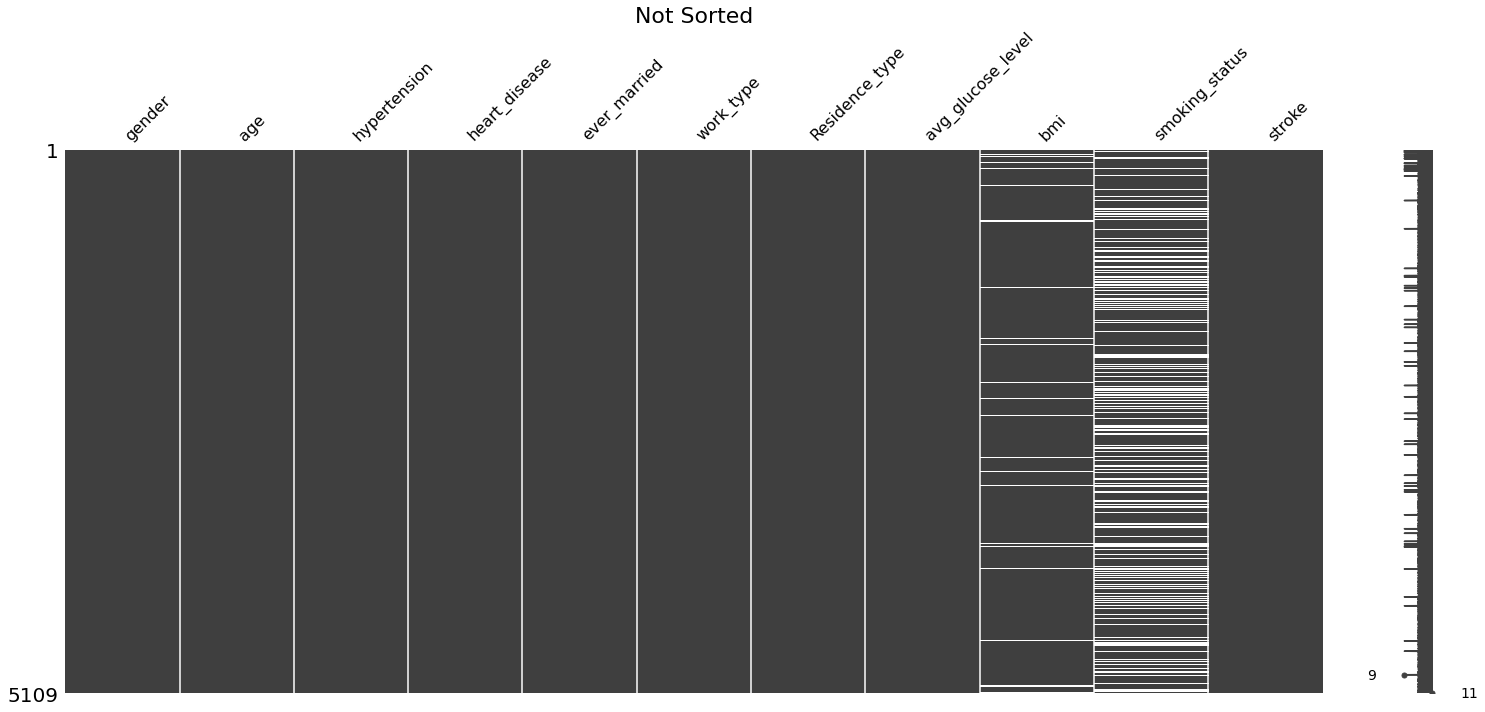

<Figure size 432x288 with 0 Axes>

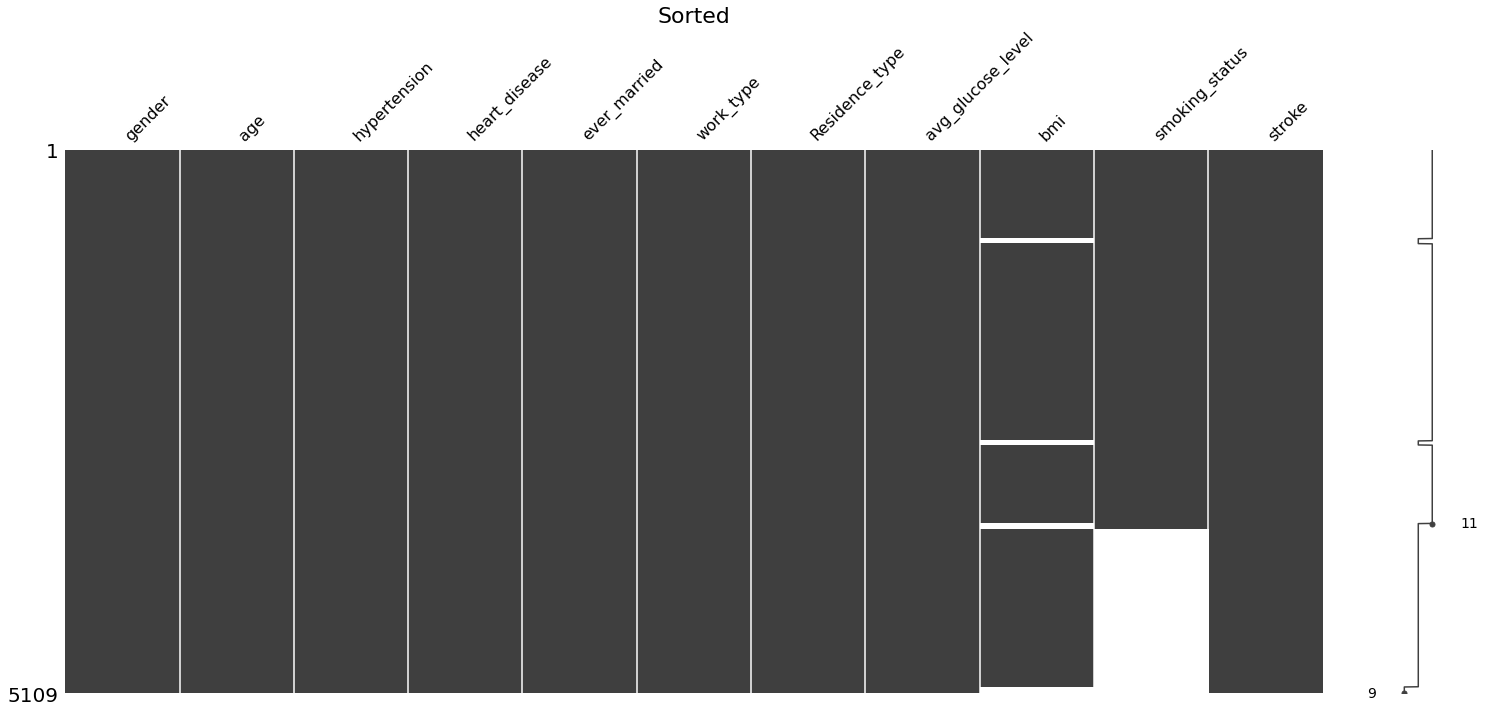

In [6]:
mn.matrix(df)
plt.title("Not Sorted",fontsize=22)
plt.figure()
mn.matrix(df.sort_values(by=["smoking_status","bmi"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [7]:
print(  df['bmi'].isna().sum().sum() ,"value from 5109 samples is missing in bmi column")
print(df['smoking_status'].isna().sum().sum(), "value from 5109 samples is missing in smoking_status column ")

201 value from 5109 samples is missing in bmi column
1544 value from 5109 samples is missing in smoking_status column 


Based on the dataframe information, some missing values are found in the dataset in the bmi and smoking_status columns. I believe that these missing data might occur because some patients did not know how to calculte their bmi or they did not want to share bmi and smoking status. the number of missing values in the bmi column can be replaced by the imputation. the smoking_status variable seems to be missing about 30% of the values. That might be too many to impute and imputation can lead to biased classification so I decide to drop the missing values, It's worth to mention that I used to impute these values in Lab 1 just for the purpose learning how imputation techniques work.

In [8]:
df.dropna(inplace=True)

In [9]:
# find the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   float64
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.1+ KB
None


In [10]:
df.reset_index(drop=True, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


0    3245
1     180
Name: stroke, dtype: int64


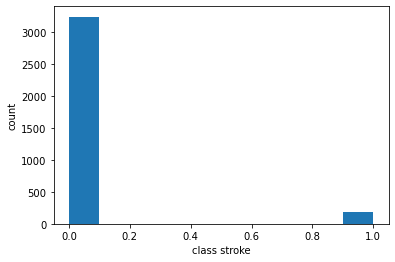


 our target column is highly imbalanced


In [12]:
# compare the length of list and set to check if the dataset contains duplicates
categorical_features_column=['stroke']
for col in categorical_features_column:
    print(df[col].value_counts())

plt.hist(df['stroke'])
plt.xlabel('class stroke') 
plt.ylabel('count')
plt.show()
print("\n"+' our target column is highly imbalanced')

I am changing hypertension,heart_disease values from 0,1 to yes,no to better show the categorical features

In [13]:
df.hypertension.replace(to_replace=0,value='No', inplace=True)
df.hypertension.replace(to_replace=1,value='Yes', inplace=True)
df.heart_disease.replace(to_replace=0,value='No', inplace=True)
df.heart_disease.replace(to_replace=1,value='Yes', inplace=True)

In [14]:
print('Class Ratio:',sum(df['stroke'])/len(df['stroke']))

Class Ratio: 0.052554744525547446


As my target is highly imbalanced I need to split data using stratified I am going to use a 20-fold cross valuation strategy and make use of Scikit-learn’s StratifiedKFold function to preserve the ratio between the classes in each fold.

In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=20)
target = df.loc[:, 'stroke']
df_train = []
df_test = []

for train_index, test_index in skf.split(df, target):
    train = df.loc[train_index, :]
    test = df.loc[test_index, :]
    
    # Append training and testing sets to lists
    df_train.append(train)
    df_test.append(test)
    
    print('Class Ratio (Fold {}): {:.2f}'.format(len(df_train), sum(test['stroke'])/len(test['stroke'])))
    


Class Ratio (Fold 1): 0.05
Class Ratio (Fold 2): 0.05
Class Ratio (Fold 3): 0.05
Class Ratio (Fold 4): 0.05
Class Ratio (Fold 5): 0.05
Class Ratio (Fold 6): 0.05
Class Ratio (Fold 7): 0.05
Class Ratio (Fold 8): 0.05
Class Ratio (Fold 9): 0.05
Class Ratio (Fold 10): 0.05
Class Ratio (Fold 11): 0.05
Class Ratio (Fold 12): 0.05
Class Ratio (Fold 13): 0.05
Class Ratio (Fold 14): 0.05
Class Ratio (Fold 15): 0.05
Class Ratio (Fold 16): 0.05
Class Ratio (Fold 17): 0.05
Class Ratio (Fold 18): 0.05
Class Ratio (Fold 19): 0.05
Class Ratio (Fold 20): 0.05


In [16]:
for i in range(0,20):

    df_train[i].stroke.replace(to_replace=1,value='Yes', inplace=True)
    df_train[i].stroke.replace(to_replace=0,value='No', inplace=True)
    df_test[i].stroke.replace(to_replace=1,value='Yes', inplace=True)
    df_test[i].stroke.replace(to_replace=0,value='No', inplace=True)

In [17]:
df_train[1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
3,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
4,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3420,Male,82.0,Yes,No,Yes,Self-employed,Rural,71.97,28.3,never smoked,No
3421,Female,57.0,No,No,Yes,Private,Rural,77.93,21.7,never smoked,No
3422,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
3423,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


In [18]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
encoders = dict() # save each encoder in dictionary
categorical_headers = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for i in range(0,20):
    # train all encoders (special case the target 'income')
    for col in categorical_headers+['stroke']:
        df_train[i][col] = df_train[i][col].str.strip()
        df_test[i][col] = df_test[i][col].str.strip()
        
        if col=="stroke":
            # special case the target, just replace the column
            tmp = LabelEncoder()
            df_train[i][col] = tmp.fit_transform(df_train[i][col])
            df_test[i][col] = tmp.transform(df_test[i][col])
        else:
            # integer encode strings that are features
            encoders[col] = LabelEncoder() # save the encoder
            df_train[i][col+'_int'] = encoders[col].fit_transform(df_train[i][col])
            df_test[i][col+'_int'] = encoders[col].transform(df_test[i][col])
        # ========================================================
        # scale the numeric, continuous variables
        numeric_headers = ["age", "avg_glucose_level", "bmi"]

        ss = StandardScaler()
        df_train[i][numeric_headers] = ss.fit_transform(df_train[i][numeric_headers].values)
        df_test[i][numeric_headers] = ss.transform(df_test[i][numeric_headers].values)

df_test[1].head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_int,hypertension_int,heart_disease_int,ever_married_int,work_type_int,Residence_type_int,smoking_status_int
9,Female,0.284092,No,No,Yes,Private,Urban,-0.078372,-0.412109,smokes,1,0,0,0,1,2,1,2
10,Female,1.608470,No,Yes,Yes,Private,Urban,2.215593,-0.287732,never smoked,1,0,0,1,1,2,1,1
11,Female,0.072191,Yes,No,Yes,Self-employed,Rural,1.238386,0.085399,never smoked,1,0,1,0,1,3,0,1
12,Male,0.813843,No,Yes,Yes,Private,Urban,1.744993,0.997497,smokes,1,1,0,1,1,2,1,2
13,Male,1.396569,Yes,No,Yes,Private,Urban,2.366319,-0.619404,smokes,1,1,1,0,1,2,1,2


In [20]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just use all inputs as-is
#   this is just to get an example running in Keras (its not a good idea)
feature_columns = categorical_headers_ints+numeric_headers

import pprint
pp = pprint.PrettyPrinter(indent=4)

print(f"We will use the following {len(feature_columns)} features:")
pp.pprint(feature_columns)

X_train=[]
y_train=[]
X_test=[]
y_test=[]
for i in range(0,20):
# combine the features into a single large matrix
    X_train.append(df_train[i][feature_columns].to_numpy())
    X_test.append(df_test[i][feature_columns].to_numpy())

    y_train.append(df_train[i]['stroke'].values.astype(np.int32))
    y_test.append(df_test[i]['stroke'].values.astype(np.int32))

We will use the following 10 features:
[   'gender_int',
    'hypertension_int',
    'heart_disease_int',
    'ever_married_int',
    'work_type_int',
    'Residence_type_int',
    'smoking_status_int',
    'age',
    'avg_glucose_level',
    'bmi']


In [21]:
X_train[1]

array([[ 1.        ,  0.        ,  1.        , ...,  0.97276823,
         2.52123141,  0.87311958],
       [ 1.        ,  0.        ,  1.        , ...,  1.66144462,
        -0.04885503,  0.30651352],
       [ 0.        ,  0.        ,  0.        , ...,  0.0192163 ,
         1.31835476,  0.56908706],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.71441973,
         0.35475551,  1.34298803],
       [ 0.        ,  0.        ,  0.        , ..., -0.7224352 ,
        -0.52887525,  0.04393998],
       [ 1.        ,  0.        ,  0.        , ...,  0.12516652,
         1.21494002, -0.64704303]])

In [22]:

# we have the following lists now of data that we can use with our dataframes:
print("Numeric Headers:")
pp.pprint(numeric_headers) # normalized numeric data
print("\nCategorical String Headers:")
pp.pprint(categorical_headers) # string data
print("\nCategorical Headers, Encoded as Integer:")
pp.pprint(categorical_headers_ints) # string data encoded as an integer

Numeric Headers:
['age', 'avg_glucose_level', 'bmi']

Categorical String Headers:
[   'gender',
    'hypertension',
    'heart_disease',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status']

Categorical Headers, Encoded as Integer:
[   'gender_int',
    'hypertension_int',
    'heart_disease_int',
    'ever_married_int',
    'work_type_int',
    'Residence_type_int',
    'smoking_status_int']


 the final dataset is a modified version of the original pandas DataFrame with additional integer-encoded columns for categorical features.The modified dataset includes the original columns with categorical data, with additional "_int" columns for each categorical column. The "_int" columns contain integer-encoded values for the corresponding categorical column in the original dataset. If the target variable is "stroke", then the target variable is encoded using the LabelEncoder object, without creating a new column.These variables are added to the dataset to improve the performance of the machine learning model.

In [23]:
df_train[0].describe()

,age,avg_glucose_level,bmi,stroke,gender_int,hypertension_int,heart_disease_int,ever_married_int,work_type_int,Residence_type_int,smoking_status_int
count,3.253000e+03,3.253000e+03,3.253000e+03,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,-1.248916e-16,8.040841e-17,2.569929e-17,0.052567,0.394098,0.117737,0.058715,0.758377,1.917922,0.512450,0.968952
std,1.000154e+00,1.000154e+00,1.000154e+00,0.223201,0.488731,0.322347,0.235127,0.428133,0.930402,0.499922,0.677313
min,-2.051538e+00,-1.114090e+00,-2.592122e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.775652e-01,-6.477697e-01,-6.827911e-01,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
50%,7.174990e-02,-3.316774e-01,-1.708690e-01,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
75%,7.618185e-01,1.559837e-01,5.209177e-01,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.770380e+00,3.462909e+00,8.545643e+00,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000


In [24]:
df_test[0].describe()

,age,avg_glucose_level,bmi,stroke,gender_int,hypertension_int,heart_disease_int,ever_married_int,work_type_int,Residence_type_int,smoking_status_int
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.004471,0.195248,0.158051,0.052326,0.331395,0.145349,0.087209,0.767442,1.941860,0.453488,1.011628
std,1.011944,1.133751,1.164185,0.223333,0.472089,0.353481,0.282965,0.423696,0.883304,0.499285,0.675281
min,-1.945374,-1.100145,-2.066364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.830647,-0.626059,-0.696627,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
50%,-0.007873,-0.219798,-0.115526,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000
75%,0.881253,0.616705,0.797632,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
max,1.770380,3.037368,4.782323,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000


### [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 

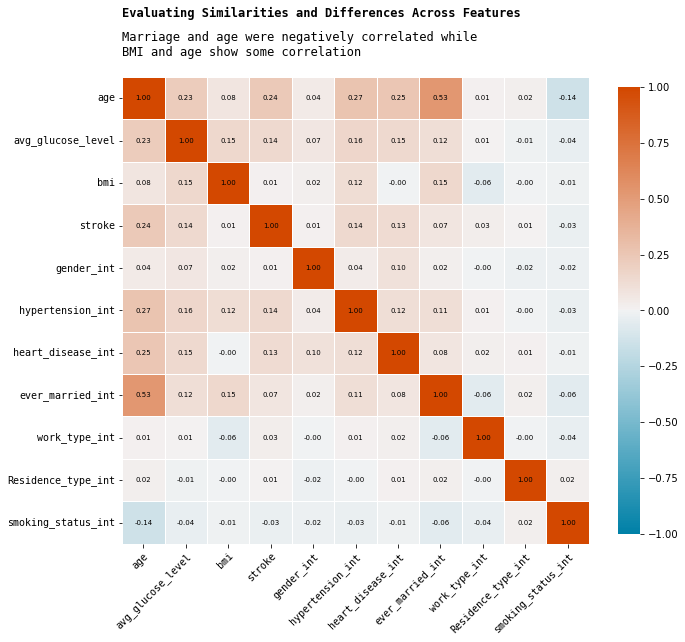

In [25]:
# Calculate the correlation matrix

corr_df = df_train[0].corr()

# Initialize the figure and gridspec
fig = plt.figure(figsize=(10, 10), facecolor="white")
gs = fig.add_gridspec(1, 1)
ax = [None for i in range(1)]

# Text properties
_fontsize = 12
_fontweightlight = "light"
_fontweightbold = "bold"
_fontfamily = "monospace"

# Add the first subplot
ax[0] = fig.add_subplot(gs[0, 0])

# Add title and subtitle
ax[0].text(
    0,
    1.15,
    "Evaluating Similarities and Differences Across Features",
    fontsize=_fontsize,
    fontweight=_fontweightbold,
    fontfamily=_fontfamily,
    transform=ax[0].transAxes,
    ha="left",
    va="top",
    clip_on=False,
)
ax[0].text(
    0,
    1.10,
    "Marriage and age were negatively correlated while\nBMI and age show some correlation",
    fontsize=_fontsize,
    fontweight=_fontweightlight,
    fontfamily=_fontfamily,
    transform=ax[0].transAxes,
    ha="left",
    va="top",
    clip_on=False,
)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, s=100, n=5, as_cmap=True)


# Plot the heatmap of the correlation matrix
sns.heatmap(
    corr_df,
    # mask=mask,
    ax=ax[0],
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.70},
)

plt.setp(
    ax[0].get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
    fontfamily=_fontfamily
)

plt.setp(
    ax[0].get_yticklabels(),
    fontfamily=_fontfamily
)

for i in range(corr_df.shape[0]):
    for j in range(corr_df.shape[1]):
        ax[0].text(
            j + 0.5,
            i + 0.5,
            "{:.2f}".format(corr_df.iloc[i, j]),
            ha="center",
            va="center",
            color="black",
            fontsize=7,
        )

plt.tight_layout()
plt.show()

I personally think that categorical data which are highly corrolated to eachother should be considered for crossing. but unfortunatelly my categorical data are not very depentent on eachother and uncorrolated data will make the model more complex and may cause overfitting. but I decide to give it a try and consider logical relations based on my life experience and below graph shows potential groups of features that could be combined into cross-product features:
               

gender,smoking_status, work_type,ever_married,heart_disease,hypertension: Women may be more likely to be married, and their lower smoking rates could be related to lower rates of heart disease and hypertension. also male more likely to do specific type of work.

gender,smoking_status, work_type:males may be more likely to smoke than females, and this smoking behavior could be related to their work type

Residence_type,work_type: dependent on the type of work individuals doing, they can live in urban or rural

I think these crossings may help  network to memorize these combinations


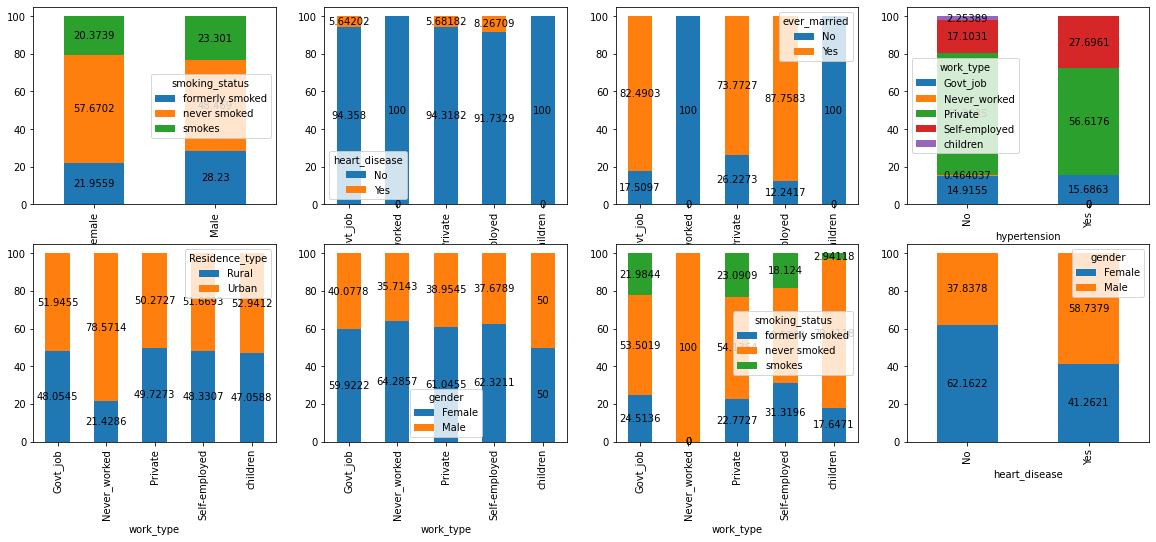

In [26]:
# plot overall cross tab with both groups
plt.figure(figsize=(20,8))
ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
ax5 = plt.subplot(2,4,5)
ax6 = plt.subplot(2,4,6)
ax7 = plt.subplot(2,4,7)
ax8 = plt.subplot(2,4,8)
pd.crosstab([df['gender']], # categories to cross tabulate
            df.smoking_status).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax1) 
for c in ax1.containers:
    
    # set the bar label
    ax1.bar_label(c, label_type='center')
    
pd.crosstab([df['work_type']], # categories to cross tabulate
            df.heart_disease).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax2) 
for c in ax2.containers:
    
    # set the bar label
    ax2.bar_label(c, label_type='center')
pd.crosstab([df['work_type']], # categories to cross tabulate
            df.ever_married).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax3) 

for c in ax3.containers:
    
    # set the bar label
    ax3.bar_label(c, label_type='center')
    
pd.crosstab([df['hypertension']], # categories to cross tabulate
            df.work_type).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax4) 
for c in ax4.containers:
    
    # set the bar label
    ax4.bar_label(c, label_type='center')

pd.crosstab([df['work_type']], # categories to cross tabulate
            df.Residence_type).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax5) 
for c in ax5.containers:
    
    # set the bar label
    ax5.bar_label(c, label_type='center')
    
pd.crosstab([df['work_type']], # categories to cross tabulate
            df.gender).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax6) 
for c in ax6.containers:
    
    # set the bar label
    ax6.bar_label(c, label_type='center')
pd.crosstab([df['work_type']], # categories to cross tabulate
            df.smoking_status).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax7) 
for c in ax7.containers:
    
    # set the bar label
    ax7.bar_label(c, label_type='center')
pd.crosstab([df['heart_disease']], # categories to cross tabulate
            df.gender).apply(lambda r: 100*r/r.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax8) 
for c in ax8.containers:
    
    # set the bar label
    ax8.bar_label(c, label_type='center')
plt.show()

In [27]:
# now let's create some different crossed values
# possible crossing options:

# choose these as a class, what makes sense??
cross_columns = [['gender','smoking_status', 'work_type','ever_married','heart_disease','hypertension'],
                 ['gender','smoking_status','heart_disease'],
                 ['Residence_type','work_type']
                ]

for i in range(0,20):
    # cross each set of columns in the list above
    cross_col_df_names = []
    for cols_list in cross_columns:
        # encode as ints for the embedding
        enc = LabelEncoder()

        # 1. create crossed labels by join operation
        X_crossed_train = df_train[i][cols_list].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[i][cols_list].apply(lambda x: '_'.join(x), axis=1)

        # get a nice name for this new crossed column
        cross_col_name = '_'.join(cols_list)

        # 2. encode as integers, stacking all possibilities
        enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))

        # 3. Save into dataframe with new name
        df_train[i][cross_col_name] = enc.transform(X_crossed_train)
        df_test[i][cross_col_name] = enc.transform(X_crossed_test)

        # Save the encoder used here for later:
        encoders[cross_col_name] = enc

        # keep track of the new names of the crossed columns
        cross_col_df_names.append(cross_col_name) 

cross_col_df_names

['gender_smoking_status_work_type_ever_married_heart_disease_hypertension',
 'gender_smoking_status_heart_disease',
 'Residence_type_work_type']

In [28]:
df_train[0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_int,hypertension_int,heart_disease_int,ever_married_int,work_type_int,Residence_type_int,smoking_status_int,gender_smoking_status_work_type_ever_married_heart_disease_hypertension,gender_smoking_status_heart_disease,Residence_type_work_type
9,Female,0.284079,No,No,Yes,Private,Urban,-0.070521,-0.406076,smokes,...,0,0,0,1,2,1,2,52,4,7
10,Female,1.611134,No,Yes,Yes,Private,Urban,2.244813,-0.281555,never smoked,...,0,0,1,1,2,1,1,32,3,7
11,Female,0.071750,Yes,No,Yes,Self-employed,Rural,1.258504,0.092010,never smoked,...,0,1,0,1,3,0,1,39,2,3
12,Male,0.814901,No,Yes,Yes,Private,Urban,1.769829,1.005168,smokes,...,1,0,1,1,2,1,2,112,11,7
13,Male,1.398805,Yes,No,Yes,Private,Urban,2.396943,-0.613612,smokes,...,1,1,0,1,2,1,2,111,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Male,1.770380,Yes,No,Yes,Self-employed,Rural,-0.758064,-0.267719,never smoked,...,1,1,0,1,3,0,1,98,8,3
3421,Female,0.443325,No,No,Yes,Private,Rural,-0.632134,-1.180877,never smoked,...,0,0,0,1,2,0,1,30,2,2
3422,Female,1.717298,No,No,Yes,Self-employed,Urban,0.366641,1.351062,never smoked,...,0,0,0,1,3,1,1,38,2,8
3423,Female,-0.724483,No,No,Yes,Self-employed,Rural,-0.525221,0.050503,never smoked,...,0,0,0,1,3,0,1,38,2,3


In [29]:
df_train[10]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_int,hypertension_int,heart_disease_int,ever_married_int,work_type_int,Residence_type_int,smoking_status_int,gender_smoking_status_work_type_ever_married_heart_disease_hypertension,gender_smoking_status_heart_disease,Residence_type_work_type
0,Male,0.971551,No,Yes,Yes,Private,Urban,2.530064,0.866858,formerly smoked,...,1,0,1,1,2,1,0,71,7,7
1,Male,1.660280,No,Yes,Yes,Private,Rural,-0.046204,0.305391,never smoked,...,1,0,1,1,2,0,1,94,9,2
2,Female,0.017926,No,No,Yes,Private,Urban,1.324294,0.565583,smokes,...,0,0,0,1,2,1,2,52,4,7
3,Female,1.607301,Yes,No,Yes,Self-employed,Rural,1.384939,-0.858626,never smoked,...,0,1,0,1,3,0,1,39,2,3
4,Male,1.713259,No,No,Yes,Private,Urban,1.638642,-0.173910,formerly smoked,...,1,0,0,1,2,1,0,69,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Male,1.766238,Yes,No,Yes,Self-employed,Rural,-0.758628,-0.269771,never smoked,...,1,1,0,1,3,0,1,98,8,3
3421,Female,0.441759,No,No,Yes,Private,Rural,-0.633560,-1.173596,never smoked,...,0,0,0,1,2,0,1,30,2,2
3422,Female,1.713259,No,No,Yes,Self-employed,Urban,0.358377,1.332465,never smoked,...,0,0,0,1,3,1,1,38,2,8
3423,Female,-0.723783,No,No,Yes,Self-employed,Rural,-0.527379,0.045199,never smoked,...,0,0,0,1,3,0,1,38,2,3


### [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance


 as the number of samples in the first class is significantly lower than second class, accuracy metric can be misleading as it can be high because the model only predicts the majority class. In this work, as we intend to predict stroke based on the other data columns it is so important to predict the probablity of having stroke correctly and failing to do so may have uncompensable consequences. Therefore, to evaluate the performance of a model, I would consider metrics to reduce false negatives cases. In such cases precision, recall and F1-score can provide a better picture of the model's performance.Precision is a useful metric when the goal is to minimize false positives, i.e., when we want to be very certain that the positive examples we classify are actually positive. For example, in a medical diagnosis task, precision would be a relevant metric if we wanted to minimize the number of false positive diagnoses, as this could lead to unnecessary treatment or anxiety for the patient..Recall is a useful metric when the goal is to minimize false negatives, i.e., when we want to be very certain that all positive examples are correctly classified as positive. For example, in a stroke diagnosis task, recall would be a relevant metric if we wanted to minimize the number of false negative diagnoses, as this could lead to delayed treatment or other negative consequences.The F1 score takes into account both false positives and false negatives and is useful when both precision and recall are important. The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates that the classifier is not performing better than a random classifier. The higher the F1 score, the better the classifier's performance.it may also be appropriate to use area under the ROC curve (AUC-ROC) as a metric for evaluating model performance. AUC-ROC measures how well the model is able to distinguish between positive and negative cases, and provides a single measure of a model's overall performance. AUC-ROC is a useful metric to use when the dataset is imbalanced, as it is not affected by the distribution of the classes.
 
======================

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=7,random_state=1)),
                    ('clf', LogisticRegression(class_weight='balanced', random_state=1))])
for i in range(0,20):
    
    pipe_lr.fit(X_train[i], y_train[i])
    y_pred = pipe_lr.predict(X_test[i])
    print(classification_report(y_test[i], y_pred))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81       163
           1       0.12      0.78      0.21         9

    accuracy                           0.69       172
   macro avg       0.55      0.73      0.51       172
weighted avg       0.94      0.69      0.78       172

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       163
           1       0.15      0.78      0.25         9

    accuracy                           0.76       172
   macro avg       0.57      0.77      0.56       172
weighted avg       0.94      0.76      0.83       172

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       163
           1       0.17      0.89      0.29         9

    accuracy                           0.77       172
   macro avg       0.58      0.83      0.58       172
weighted avg       0.95      0.77      0.84       172

              preci

### [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

As my target class is highly imbalanced I decide to choose stratified 20-fold cross-validation to devide my data into training and testing. Stratified 20-fold cross-validation is a variation of 20-fold cross-validation that ensures that each fold has a proportional representation of each class.As my target is highly imbalanced I need to split data using stratified I am going to use a 20-fold cross valuation strategy and make use of Scikit-learn’s StratifiedKFold function to preserve the ratio between the classes in each fold.

## Modeling (5 points total)
[2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [31]:
# get crossed columns
X_train_crossed = df_train[0][cross_col_df_names].to_numpy()
X_test_crossed = df_test[0][cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[0][categorical_headers_ints].to_numpy() 
X_test_cat = df_test[0][categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[0][numeric_headers].to_numpy()
X_test_num = df_test[0][numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [32]:
%%time

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 3s 7ms/step - loss: 0.4012 - recall: 0.0058 - val_loss: 0.1973 - val_recall: 0.0000e+00
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1931 - recall: 0.0000e+00 - val_loss: 0.1712 - val_recall: 0.0000e+00
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1785 - recall: 0.0000e+00 - val_loss: 0.1644 - val_recall: 0.0000e+00
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1731 - recall: 0.0000e+00 - val_loss: 0.1596 - val_recall: 0.0000e+00
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1698 - recall: 0.0000e+00 - val_loss: 0.1597 - val_recall: 0.0000e+00
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1670 - recall: 0.0000e+00 - val_loss: 0.1617 - val_recall: 0.0000e+00
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1658 - recall: 0.0000e+00 - val_loss: 0.1595 - val_recall: 0.0000e

Epoch 30/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1401 - recall: 0.1170 - val_loss: 0.1733 - val_recall: 0.1111
Epoch 1/30
66/66 [==============================] - 0s 4ms/step - loss: 0.1434 - recall: 0.1228 - val_loss: 0.1032 - val_recall: 0.1111
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1418 - recall: 0.1111 - val_loss: 0.1035 - val_recall: 0.1111
Epoch 3/30
66/66 [==============================] - 0s 5ms/step - loss: 0.1413 - recall: 0.1170 - val_loss: 0.1056 - val_recall: 0.1111
Epoch 4/30
66/66 [==============================] - 0s 4ms/step - loss: 0.1407 - recall: 0.1228 - val_loss: 0.1097 - val_recall: 0.1111
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1393 - recall: 0.1053 - val_loss: 0.1089 - val_recall: 0.2222
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1412 - recall: 0.1462 - val_loss: 0.1124 - val_recall: 0.1111
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1040 - recall: 0.4094 - val_loss: 0.1685 - val_recall: 0.1111
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.1065 - recall: 0.3509 - val_loss: 0.1023 - val_recall: 0.3333
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1041 - recall: 0.3684 - val_loss: 0.1071 - val_recall: 0.2222
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1046 - recall: 0.3743 - val_loss: 0.1129 - val_recall: 0.2222
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1017 - recall: 0.3918 - val_loss: 0.1053 - val_recall: 0.2222
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1011 - recall: 0.3684 - val_loss: 0.1199 - val_recall: 0.2222
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.1013 - recall: 0.3684 - val_loss: 0.1181 - val_recall: 0.5556
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0678 - recall: 0.5848 - val_loss: 0.1330 - val_recall: 0.4444
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0883 - recall: 0.5263 - val_loss: 0.0565 - val_recall: 0.5556
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0715 - recall: 0.5380 - val_loss: 0.0575 - val_recall: 0.6667
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0710 - recall: 0.5731 - val_loss: 0.0641 - val_recall: 0.6667
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0709 - recall: 0.5848 - val_loss: 0.0717 - val_recall: 0.4444
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0673 - recall: 0.6316 - val_loss: 0.0706 - val_recall: 0.7778
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0861 - recall: 0.5614 - val_loss: 0.0735 - val_recall: 0.4444
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0429 - recall: 0.7251 - val_loss: 0.1060 - val_recall: 0.4444
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0459 - recall: 0.7602 - val_loss: 0.0189 - val_recall: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0509 - recall: 0.7427 - val_loss: 0.0263 - val_recall: 0.8889
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0524 - recall: 0.7193 - val_loss: 0.0305 - val_recall: 0.8889
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0491 - recall: 0.7485 - val_loss: 0.0481 - val_recall: 0.4444
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0580 - recall: 0.7076 - val_loss: 0.0366 - val_recall: 0.7778
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0469 - recall: 0.7368 - val_loss: 0.0275 - val_recall: 1.0000
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0313 - recall: 0.8012 - val_loss: 0.1763 - val_recall: 0.4444
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0395 - recall: 0.8070 - val_loss: 0.0484 - val_recall: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0300 - recall: 0.8538 - val_loss: 0.0440 - val_recall: 0.8889
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0442 - recall: 0.7778 - val_loss: 0.0658 - val_recall: 0.8889
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0302 - recall: 0.8596 - val_loss: 0.0451 - val_recall: 0.8889
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0263 - recall: 0.8480 - val_loss: 0.0546 - val_recall: 0.8889
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0276 - recall: 0.8655 - val_loss: 0.0487 - val_recall: 0.8889
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0151 - recall: 0.9474 - val_loss: 0.0678 - val_recall: 0.5556
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0203 - recall: 0.9240 - val_loss: 0.0196 - val_recall: 0.7778
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0176 - recall: 0.9298 - val_loss: 0.0292 - val_recall: 0.7778
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0192 - recall: 0.9064 - val_loss: 0.0513 - val_recall: 0.7778
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0159 - recall: 0.9240 - val_loss: 0.0436 - val_recall: 0.7778
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0183 - recall: 0.9240 - val_loss: 0.0231 - val_recall: 0.8889
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0200 - recall: 0.9181 - val_loss: 0.0459 - val_recall: 0.7778
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0101 - recall: 0.9766 - val_loss: 0.0257 - val_recall: 0.8889
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0138 - recall: 0.9532 - val_loss: 0.0048 - val_recall: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0103 - recall: 0.9708 - val_loss: 0.0078 - val_recall: 0.8889
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0108 - recall: 0.9766 - val_loss: 0.0044 - val_recall: 1.0000
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0138 - recall: 0.9532 - val_loss: 0.0058 - val_recall: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0131 - recall: 0.9415 - val_loss: 0.0159 - val_recall: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0233 - recall: 0.9181 - val_loss: 0.0126 - val_recall: 0.8889
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0154 - recall: 0.9532 - val_loss: 0.0909 - val_recall: 0.5556
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0153 - recall: 0.9474 - val_loss: 0.0112 - val_recall: 0.8889
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0486 - recall: 0.8538 - val_loss: 0.0530 - val_recall: 0.6667
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0246 - recall: 0.8947 - val_loss: 0.0122 - val_recall: 0.8889
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0190 - recall: 0.9357 - val_loss: 0.0142 - val_recall: 0.8889
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0114 - recall: 0.9649 - val_loss: 0.0262 - val_recall: 0.8889
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0099 - recall: 0.9591 - val_loss: 0.0211 - val_recall: 0.8889
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0144 - recall: 0.9532 - val_loss: 0.0728 - val_recall: 0.5556
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0149 - recall: 0.9532 - val_loss: 0.0063 - val_recall: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0161 - recall: 0.9415 - val_loss: 0.0149 - val_recall: 1.0000
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0152 - recall: 0.9532 - val_loss: 0.0148 - val_recall: 0.8889
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0112 - recall: 0.9708 - val_loss: 0.0080 - val_recall: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0097 - recall: 0.9708 - val_loss: 0.0186 - val_recall: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0061 - recall: 0.9883 - val_loss: 0.0152 - val_recall: 1.0000
Epoch 7/30
66/66 [=============================

Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0058 - recall: 0.9825 - val_loss: 0.0137 - val_recall: 1.0000
Wall time: 1min 44s


Text(0.5, 0, 'epochs')

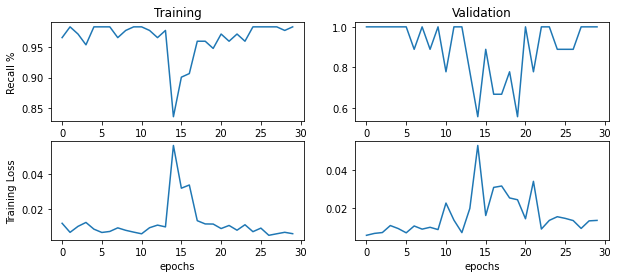

In [33]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In this graph, I used Adam optimzier and binary_crossentropy as my loss function, as you can see with increasing the number of training epoched, the recall metric is increasing and data shows very good performance.

In [34]:
%%time

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 1s 6ms/step - loss: 0.0043 - recall_1: 0.9942 - val_loss: 0.0057 - val_recall_1: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0048 - recall_1: 0.9883 - val_loss: 0.0058 - val_recall_1: 1.0000
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0040 - recall_1: 0.9942 - val_loss: 0.0069 - val_recall_1: 1.0000
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0040 - recall_1: 0.9883 - val_loss: 0.0075 - val_recall_1: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0039 - recall_1: 0.9942 - val_loss: 0.0068 - val_recall_1: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0040 - recall_1: 0.9883 - val_loss: 0.0066 - val_recall_1: 1.0000
Epoch 7/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0040 - recall_1: 0.9942 - val_loss: 0.0066 - val_recall_1: 1.0000
Epoch 8/30
66/66 [==

66/66 [==============================] - 0s 2ms/step - loss: 0.0037 - recall_1: 0.9942 - val_loss: 0.0151 - val_recall_1: 0.8889
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0026 - recall_1: 0.9883 - val_loss: 0.0182 - val_recall_1: 0.8889
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0036 - recall_1: 0.9942 - val_loss: 0.0186 - val_recall_1: 0.8889
Epoch 29/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0033 - recall_1: 0.9942 - val_loss: 0.0217 - val_recall_1: 0.7778
Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0041 - recall_1: 0.9942 - val_loss: 0.0171 - val_recall_1: 0.8889
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0039 - recall_1: 0.9883 - val_loss: 0.0012 - val_recall_1: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0038 - recall_1: 0.9883 - val_loss: 0.0015 - val_recall_1: 1.0000
Epoch 3/30
66/66 [=========

66/66 [==============================] - 0s 2ms/step - loss: 0.0040 - recall_1: 0.9883 - val_loss: 0.0024 - val_recall_1: 1.0000
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0028 - recall_1: 0.9942 - val_loss: 0.0020 - val_recall_1: 1.0000
Epoch 24/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0038 - recall_1: 0.9883 - val_loss: 0.0022 - val_recall_1: 1.0000
Epoch 25/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0034 - recall_1: 0.9883 - val_loss: 0.0024 - val_recall_1: 1.0000
Epoch 26/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0032 - recall_1: 0.9883 - val_loss: 0.0025 - val_recall_1: 1.0000
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0038 - recall_1: 0.9942 - val_loss: 0.0022 - val_recall_1: 1.0000
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0033 - recall_1: 1.0000 - val_loss: 0.0023 - val_recall_1: 1.0000
Epoch 29/30
66/66 [======

66/66 [==============================] - 0s 2ms/step - loss: 0.0026 - recall_1: 0.9883 - val_loss: 0.0026 - val_recall_1: 1.0000
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0032 - recall_1: 0.9942 - val_loss: 0.0015 - val_recall_1: 1.0000
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0024 - recall_1: 0.9942 - val_loss: 0.0020 - val_recall_1: 1.0000
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0036 - recall_1: 0.9883 - val_loss: 0.0017 - val_recall_1: 1.0000
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0037 - recall_1: 0.9883 - val_loss: 0.0017 - val_recall_1: 1.0000
Epoch 22/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0034 - recall_1: 0.9825 - val_loss: 0.0020 - val_recall_1: 1.0000
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0028 - recall_1: 0.9942 - val_loss: 0.0016 - val_recall_1: 1.0000
Epoch 24/30
66/66 [======

66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_1: 1.0000 - val_loss: 0.0201 - val_recall_1: 1.0000
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_1: 1.0000 - val_loss: 0.0204 - val_recall_1: 1.0000
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_1: 1.0000 - val_loss: 0.0243 - val_recall_1: 1.0000
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_1: 1.0000 - val_loss: 0.0245 - val_recall_1: 1.0000
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_1: 1.0000 - val_loss: 0.0217 - val_recall_1: 1.0000
Epoch 18/30
66/66 [==============================] - 0s 4ms/step - loss: 0.0015 - recall_1: 0.9942 - val_loss: 0.0198 - val_recall_1: 1.0000
Epoch 19/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0016 - recall_1: 0.9942 - val_loss: 0.0204 - val_recall_1: 1.0000
Epoch 20/30
66/66 [======

66/66 [==============================] - 0s 3ms/step - loss: 0.0033 - recall_1: 0.9883 - val_loss: 0.0017 - val_recall_1: 1.0000
Epoch 9/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0031 - recall_1: 0.9942 - val_loss: 0.0019 - val_recall_1: 1.0000
Epoch 10/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - recall_1: 0.9942 - val_loss: 0.0018 - val_recall_1: 1.0000
Epoch 11/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0037 - recall_1: 0.9942 - val_loss: 0.0020 - val_recall_1: 1.0000
Epoch 12/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0023 - recall_1: 0.9942 - val_loss: 0.0028 - val_recall_1: 1.0000
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0029 - recall_1: 0.9942 - val_loss: 0.0026 - val_recall_1: 1.0000
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - recall_1: 0.9883 - val_loss: 0.0018 - val_recall_1: 1.0000
Epoch 15/30
66/66 [=======

Text(0.5, 0, 'epochs')

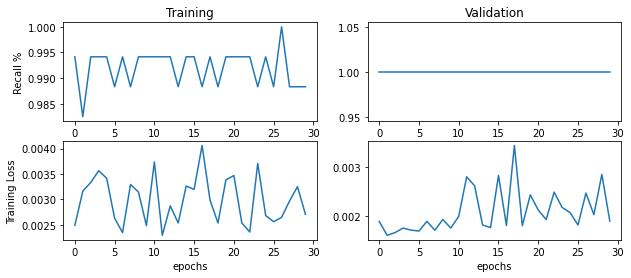

In [35]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall_1'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall_1'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In this graph, I used stochastic gradient descent optimzier and binary_crossentropy as my loss function, as you can see optimizer has a good overall performance, the osilaction is due to picking random values. this optimizer has very high recall and validation.

In [36]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 2s 6ms/step - loss: 0.0018 - recall_2: 0.9708 - val_loss: 0.0043 - val_recall_2: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0032 - recall_2: 0.9708 - val_loss: 0.0045 - val_recall_2: 1.0000
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0031 - recall_2: 0.9708 - val_loss: 0.0045 - val_recall_2: 1.0000
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - recall_2: 0.9649 - val_loss: 0.0093 - val_recall_2: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0053 - recall_2: 0.9298 - val_loss: 0.0039 - val_recall_2: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0026 - recall_2: 0.9649 - val_loss: 0.0065 - val_recall_2: 1.0000
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0039 - recall_2: 0.9415 - val_loss: 3.9514e-04 - val_recall_2: 1.0000
Epoch 8/30
66/66

66/66 [==============================] - 0s 2ms/step - loss: 0.0081 - recall_2: 0.9123 - val_loss: 0.0356 - val_recall_2: 0.6667
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0062 - recall_2: 0.9357 - val_loss: 0.0237 - val_recall_2: 0.6667
Epoch 29/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0041 - recall_2: 0.9415 - val_loss: 0.0164 - val_recall_2: 0.6667
Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0045 - recall_2: 0.9357 - val_loss: 0.0108 - val_recall_2: 0.7778
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0032 - recall_2: 0.9591 - val_loss: 0.0024 - val_recall_2: 0.8889
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0021 - recall_2: 0.9708 - val_loss: 0.0022 - val_recall_2: 0.8889
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0023 - recall_2: 0.9708 - val_loss: 0.0020 - val_recall_2: 0.8889
Epoch 4/30
66/66 [==========

66/66 [==============================] - 0s 2ms/step - loss: 6.8856e-04 - recall_2: 0.9883 - val_loss: 3.4202e-04 - val_recall_2: 1.0000
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 8.2251e-04 - recall_2: 0.9883 - val_loss: 6.5786e-04 - val_recall_2: 1.0000
Epoch 24/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9766 - val_loss: 8.1212e-04 - val_recall_2: 1.0000
Epoch 25/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_2: 0.9825 - val_loss: 0.0017 - val_recall_2: 1.0000
Epoch 26/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_2: 0.9825 - val_loss: 0.0011 - val_recall_2: 1.0000
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - recall_2: 0.9825 - val_loss: 2.5418e-04 - val_recall_2: 1.0000
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_2: 0.9708 - val_loss: 6.7096e-04 - val_recall_2: 1.00

Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0016 - recall_2: 0.9883 - val_loss: 0.0057 - val_recall_2: 0.8889
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_2: 0.9825 - val_loss: 0.0040 - val_recall_2: 0.8889
Epoch 19/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0018 - recall_2: 0.9766 - val_loss: 0.0060 - val_recall_2: 0.8889
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0038 - recall_2: 0.9532 - val_loss: 0.0112 - val_recall_2: 0.8889
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0049 - recall_2: 0.9298 - val_loss: 0.0084 - val_recall_2: 0.8889
Epoch 22/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0035 - recall_2: 0.9357 - val_loss: 0.0177 - val_recall_2: 0.8889
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0019 - recall_2: 0.9766 - val_loss: 0.0083 - val_recall_2: 0.7778
Epoch 24/30
6

Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_2: 0.9766 - val_loss: 0.0020 - val_recall_2: 0.8889
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0018 - recall_2: 0.9825 - val_loss: 0.0016 - val_recall_2: 1.0000
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - recall_2: 0.9766 - val_loss: 0.0043 - val_recall_2: 0.8889
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_2: 0.9825 - val_loss: 9.8545e-04 - val_recall_2: 1.0000
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0021 - recall_2: 0.9708 - val_loss: 0.0047 - val_recall_2: 0.8889
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0018 - recall_2: 0.9708 - val_loss: 6.5291e-04 - val_recall_2: 1.0000
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_2: 0.9766 - val_loss: 4.4511e-04 - val_recall_2: 1.0000
E

Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9708 - val_loss: 0.0116 - val_recall_2: 0.8889
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9766 - val_loss: 0.0117 - val_recall_2: 0.8889
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9708 - val_loss: 0.0116 - val_recall_2: 0.8889
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9708 - val_loss: 0.0116 - val_recall_2: 0.8889
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_2: 0.9708 - val_loss: 0.0115 - val_recall_2: 0.8889
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0023 - recall_2: 0.9591 - val_loss: 0.0116 - val_recall_2: 0.8889
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0027 - recall_2: 0.9649 - val_loss: 0.0109 - val_recall_2: 0.8889
Epoch 20/30
6

Epoch 11/30
66/66 [==============================] - 0s 2ms/step - loss: 7.7195e-04 - recall_2: 0.9883 - val_loss: 0.0011 - val_recall_2: 1.0000
Epoch 12/30
66/66 [==============================] - 0s 2ms/step - loss: 7.7333e-04 - recall_2: 0.9883 - val_loss: 0.0025 - val_recall_2: 0.8889
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 8.8642e-04 - recall_2: 0.9825 - val_loss: 4.6160e-04 - val_recall_2: 1.0000
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 9.4616e-04 - recall_2: 0.9883 - val_loss: 0.0044 - val_recall_2: 0.8889
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 7.5919e-04 - recall_2: 0.9825 - val_loss: 8.9334e-04 - val_recall_2: 1.0000
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 7.4068e-04 - recall_2: 0.9883 - val_loss: 0.0028 - val_recall_2: 0.8889
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 8.0976e-04 - recall_2: 0.9825 - val_loss: 0.0015 

Text(0.5, 0, 'epochs')

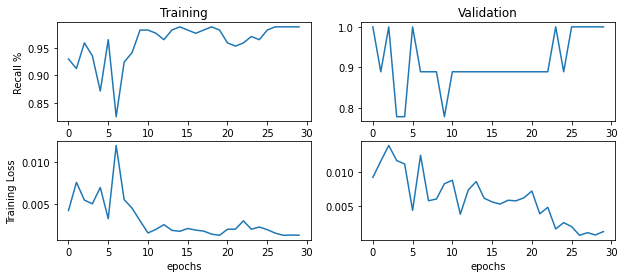

In [37]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall_2'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall_2'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In this graph, I used Adam optimzier and mean square error as my loss function, as you can see with increasing the number of training epoched, the recall metric is increasing and data shows very good performance overall.

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.

In [38]:
# get crossed columns
X_train_crossed = df_train[0][cross_col_df_names].to_numpy()
X_test_crossed = df_test[0][cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[0][categorical_headers_ints].to_numpy() 
X_test_cat = df_test[0][categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[0][numeric_headers].to_numpy()
X_test_num = df_test[0][numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=5,activation='relu', name='deep4')(deep_branch)   

# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [39]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 2s 7ms/step - loss: 0.1459 - recall_3: 0.0468 - val_loss: 0.0506 - val_recall_3: 0.0000e+00
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0499 - recall_3: 0.0000e+00 - val_loss: 0.0483 - val_recall_3: 0.0000e+00
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0485 - recall_3: 0.0000e+00 - val_loss: 0.0472 - val_recall_3: 0.0000e+00
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0472 - recall_3: 0.0000e+00 - val_loss: 0.0466 - val_recall_3: 0.0000e+00
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0464 - recall_3: 0.0000e+00 - val_loss: 0.0469 - val_recall_3: 0.0000e+00
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0458 - recall_3: 0.0000e+00 - val_loss: 0.0462 - val_recall_3: 0.0000e+00
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0451 - recall_3: 0.0000e+00 - val_loss: 0.

66/66 [==============================] - 0s 2ms/step - loss: 0.0287 - recall_3: 0.4269 - val_loss: 0.0434 - val_recall_3: 0.2222
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0287 - recall_3: 0.4327 - val_loss: 0.0434 - val_recall_3: 0.1111
Epoch 28/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0280 - recall_3: 0.4327 - val_loss: 0.0444 - val_recall_3: 0.1111
Epoch 29/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0273 - recall_3: 0.4444 - val_loss: 0.0440 - val_recall_3: 0.1111
Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0286 - recall_3: 0.4269 - val_loss: 0.0485 - val_recall_3: 0.1111
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0364 - recall_3: 0.2573 - val_loss: 0.0434 - val_recall_3: 0.2222
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0352 - recall_3: 0.2690 - val_loss: 0.0411 - val_recall_3: 0.2222
Epoch 3/30
66/66 [=========

66/66 [==============================] - 0s 2ms/step - loss: 0.0183 - recall_3: 0.6608 - val_loss: 0.0316 - val_recall_3: 0.4444
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0183 - recall_3: 0.6725 - val_loss: 0.0333 - val_recall_3: 0.4444
Epoch 24/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0181 - recall_3: 0.6667 - val_loss: 0.0323 - val_recall_3: 0.4444
Epoch 25/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0188 - recall_3: 0.6608 - val_loss: 0.0356 - val_recall_3: 0.3333
Epoch 26/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0183 - recall_3: 0.6667 - val_loss: 0.0369 - val_recall_3: 0.2222
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0181 - recall_3: 0.6608 - val_loss: 0.0345 - val_recall_3: 0.4444
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0182 - recall_3: 0.6667 - val_loss: 0.0307 - val_recall_3: 0.4444
Epoch 29/30
66/66 [======

66/66 [==============================] - 0s 2ms/step - loss: 0.0176 - recall_3: 0.6667 - val_loss: 0.0130 - val_recall_3: 0.7778
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0193 - recall_3: 0.6491 - val_loss: 0.0149 - val_recall_3: 0.7778
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0188 - recall_3: 0.6667 - val_loss: 0.0161 - val_recall_3: 0.6667
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0183 - recall_3: 0.6842 - val_loss: 0.0149 - val_recall_3: 0.6667
Epoch 22/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0188 - recall_3: 0.6667 - val_loss: 0.0170 - val_recall_3: 0.7778
Epoch 23/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0187 - recall_3: 0.6725 - val_loss: 0.0179 - val_recall_3: 0.6667
Epoch 24/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0182 - recall_3: 0.6667 - val_loss: 0.0180 - val_recall_3: 0.6667
Epoch 25/30
66/66 [======

66/66 [==============================] - 0s 3ms/step - loss: 0.0162 - recall_3: 0.6901 - val_loss: 0.0129 - val_recall_3: 0.7778
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0163 - recall_3: 0.6901 - val_loss: 0.0132 - val_recall_3: 0.7778
Epoch 16/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0161 - recall_3: 0.7018 - val_loss: 0.0133 - val_recall_3: 0.7778
Epoch 17/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0163 - recall_3: 0.6959 - val_loss: 0.0192 - val_recall_3: 0.6667
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0169 - recall_3: 0.6842 - val_loss: 0.0132 - val_recall_3: 0.7778
Epoch 19/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0169 - recall_3: 0.6842 - val_loss: 0.0143 - val_recall_3: 0.7778
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0165 - recall_3: 0.7018 - val_loss: 0.0133 - val_recall_3: 0.7778
Epoch 21/30
66/66 [======

66/66 [==============================] - 0s 3ms/step - loss: 0.0186 - recall_3: 0.6667 - val_loss: 0.0234 - val_recall_3: 0.5556
Epoch 11/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0185 - recall_3: 0.6667 - val_loss: 0.0278 - val_recall_3: 0.4444
Epoch 12/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0177 - recall_3: 0.6725 - val_loss: 0.0230 - val_recall_3: 0.5556
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0166 - recall_3: 0.6959 - val_loss: 0.0218 - val_recall_3: 0.5556
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0164 - recall_3: 0.6959 - val_loss: 0.0237 - val_recall_3: 0.6667
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0160 - recall_3: 0.7135 - val_loss: 0.0178 - val_recall_3: 0.6667
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0159 - recall_3: 0.7076 - val_loss: 0.0217 - val_recall_3: 0.5556
Epoch 17/30
66/66 [======

Text(0.5, 0, 'epochs')

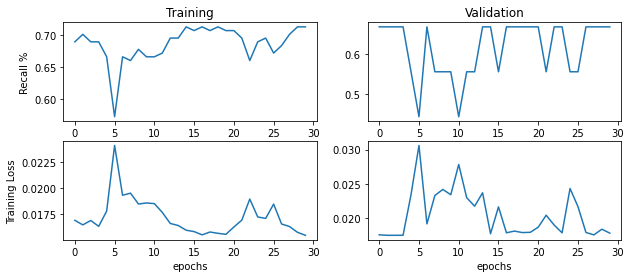

In [40]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall_3'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall_3'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In this graph, I used Adam optimzier and mean_squared_error, I increased the number of deep layer to 4layer as my loss function, as you can see the overall training and validation rate is decreased that indicates overfitting

In [41]:
# get crossed columns
X_train_crossed = df_train[0][cross_col_df_names].to_numpy()
X_test_crossed = df_test[0][cross_col_df_names].to_numpy()

# save categorical features
X_train_cat = df_train[0][categorical_headers_ints].to_numpy() 
X_test_cat = df_test[0][categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[0][numeric_headers].to_numpy()
X_test_num = df_test[0][numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N = len(encoders[col].classes_)
    N_reduced = int(np.sqrt(N))
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=5,activation='relu', name='deep4')(deep_branch)   
deep_branch = Dense(units=3,activation='relu', name='deep5')(deep_branch)   
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [42]:
%%time

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 3s 6ms/step - loss: 0.1315 - recall_4: 0.0058 - val_loss: 0.0495 - val_recall_4: 0.0000e+00
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0503 - recall_4: 0.0000e+00 - val_loss: 0.0481 - val_recall_4: 0.0000e+00
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0489 - recall_4: 0.0000e+00 - val_loss: 0.0461 - val_recall_4: 0.0000e+00
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0471 - recall_4: 0.0000e+00 - val_loss: 0.0456 - val_recall_4: 0.0000e+00
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0460 - recall_4: 0.0000e+00 - val_loss: 0.0457 - val_recall_4: 0.0000e+00
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0453 - recall_4: 0.0000e+00 - val_loss: 0.0456 - val_recall_4: 0.0000e+00
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0450 - recall_4: 0.0000e+00 - val_loss: 0.

66/66 [==============================] - 0s 4ms/step - loss: 0.0262 - recall_4: 0.5146 - val_loss: 0.0412 - val_recall_4: 0.2222
Epoch 27/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0262 - recall_4: 0.5322 - val_loss: 0.0407 - val_recall_4: 0.2222
Epoch 28/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0269 - recall_4: 0.4971 - val_loss: 0.0428 - val_recall_4: 0.2222
Epoch 29/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0263 - recall_4: 0.5088 - val_loss: 0.0428 - val_recall_4: 0.3333
Epoch 30/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0259 - recall_4: 0.5146 - val_loss: 0.0414 - val_recall_4: 0.4444
Epoch 1/30
66/66 [==============================] - 0s 4ms/step - loss: 0.0263 - recall_4: 0.5322 - val_loss: 0.0355 - val_recall_4: 0.4444
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0261 - recall_4: 0.5205 - val_loss: 0.0321 - val_recall_4: 0.4444
Epoch 3/30
66/66 [=========

66/66 [==============================] - 0s 2ms/step - loss: 0.0177 - recall_4: 0.6667 - val_loss: 0.0339 - val_recall_4: 0.4444
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0191 - recall_4: 0.6550 - val_loss: 0.0389 - val_recall_4: 0.2222
Epoch 24/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0187 - recall_4: 0.6550 - val_loss: 0.0449 - val_recall_4: 0.2222
Epoch 25/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0243 - recall_4: 0.5673 - val_loss: 0.0526 - val_recall_4: 0.2222
Epoch 26/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0205 - recall_4: 0.6316 - val_loss: 0.0403 - val_recall_4: 0.3333
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0191 - recall_4: 0.6667 - val_loss: 0.0411 - val_recall_4: 0.3333
Epoch 28/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0228 - recall_4: 0.5789 - val_loss: 0.0430 - val_recall_4: 0.3333
Epoch 29/30
66/66 [======

66/66 [==============================] - 0s 4ms/step - loss: 0.0176 - recall_4: 0.6784 - val_loss: 0.0125 - val_recall_4: 0.7778
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0177 - recall_4: 0.6725 - val_loss: 0.0123 - val_recall_4: 0.7778
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0176 - recall_4: 0.6784 - val_loss: 0.0123 - val_recall_4: 0.7778
Epoch 21/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0174 - recall_4: 0.6842 - val_loss: 0.0124 - val_recall_4: 0.7778
Epoch 22/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0172 - recall_4: 0.6901 - val_loss: 0.0119 - val_recall_4: 0.7778
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0171 - recall_4: 0.6901 - val_loss: 0.0119 - val_recall_4: 0.7778
Epoch 24/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0170 - recall_4: 0.6842 - val_loss: 0.0120 - val_recall_4: 0.7778
Epoch 25/30
66/66 [======

66/66 [==============================] - 0s 3ms/step - loss: 0.0182 - recall_4: 0.6725 - val_loss: 0.0239 - val_recall_4: 0.7778
Epoch 15/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0187 - recall_4: 0.6725 - val_loss: 0.0171 - val_recall_4: 0.7778
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0206 - recall_4: 0.6374 - val_loss: 0.0181 - val_recall_4: 0.7778
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0192 - recall_4: 0.6608 - val_loss: 0.0168 - val_recall_4: 0.7778
Epoch 18/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0188 - recall_4: 0.6550 - val_loss: 0.0272 - val_recall_4: 0.5556
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0196 - recall_4: 0.6491 - val_loss: 0.0196 - val_recall_4: 0.7778
Epoch 20/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0187 - recall_4: 0.6491 - val_loss: 0.0159 - val_recall_4: 0.7778
Epoch 21/30
66/66 [======

66/66 [==============================] - 0s 2ms/step - loss: 0.0198 - recall_4: 0.6316 - val_loss: 0.0193 - val_recall_4: 0.7778
Epoch 11/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0214 - recall_4: 0.6433 - val_loss: 0.0179 - val_recall_4: 0.6667
Epoch 12/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0207 - recall_4: 0.6433 - val_loss: 0.0192 - val_recall_4: 0.5556
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0205 - recall_4: 0.6374 - val_loss: 0.0197 - val_recall_4: 0.6667
Epoch 14/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0205 - recall_4: 0.6433 - val_loss: 0.0193 - val_recall_4: 0.6667
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0188 - recall_4: 0.6491 - val_loss: 0.0193 - val_recall_4: 0.6667
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0190 - recall_4: 0.6725 - val_loss: 0.0143 - val_recall_4: 0.6667
Epoch 17/30
66/66 [======

Text(0.5, 0, 'epochs')

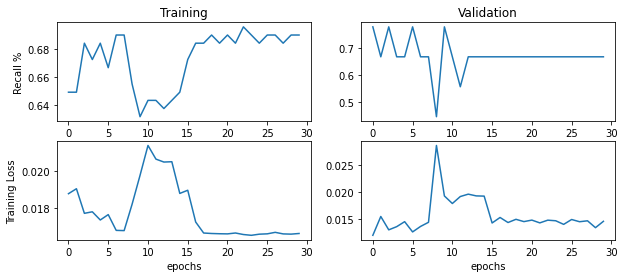

In [43]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall_4'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall_4'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In this graph, I used Adam optimzier and mean_squared_error, I increased the number of deeo layer to 5layer as my loss function, as you can see the overall percentage of recall and training is decreasing which shows overfitting

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). .

In [44]:
# save categorical features
X_train_cat = df_train[0][categorical_headers_ints].to_numpy() 
X_test_cat = df_test[0][categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[0][numeric_headers].to_numpy()
X_test_num = df_test[0][numeric_headers].to_numpy()



# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = max(df_train[0][col].max(),df_test[0][col].max())+1
    N_reduced = int(np.sqrt(N))
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=N_reduced, 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep 

final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(deep_branch)

model2= Model(inputs=[input_cat,input_num], 
              outputs=final_branch)

In [53]:
%%time

model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
for i in range(0,20):
    
    # get crossed columns
    X_train_crossed=(df_train[i][cross_col_df_names].to_numpy())
    X_test_crossed=(df_test[i][cross_col_df_names].to_numpy())

    # save categorical features
    X_train_cat=(df_train[i][categorical_headers_ints].to_numpy()) 
    X_test_cat=(df_test[i][categorical_headers_ints].to_numpy() )

    # and save off the numeric features
    X_train_num=(df_train[i][numeric_headers].to_numpy())
    X_test_num=(df_test[i][numeric_headers].to_numpy())


    history = model2.fit([X_train_cat,X_train_num],
                        y_train[i], 
                        epochs=30, 
                        batch_size=50, 
                        verbose=1, 
                        validation_data = ([X_test_cat,X_test_num],y_test[i]))

Epoch 1/30
66/66 [==============================] - 1s 6ms/step - loss: 0.0068 - recall_6: 0.9766 - val_loss: 0.0141 - val_recall_6: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0033 - recall_6: 0.9942 - val_loss: 0.0155 - val_recall_6: 1.0000
Epoch 3/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0025 - recall_6: 0.9942 - val_loss: 0.0139 - val_recall_6: 1.0000
Epoch 4/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0022 - recall_6: 0.9942 - val_loss: 0.0153 - val_recall_6: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_6: 0.9942 - val_loss: 0.0155 - val_recall_6: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0019 - recall_6: 1.0000 - val_loss: 0.0156 - val_recall_6: 1.0000
Epoch 7/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0019 - recall_6: 0.9942 - val_loss: 0.0159 - val_recall_6: 1.0000
Epoch 8/30
66/66 [==

66/66 [==============================] - 0s 2ms/step - loss: 9.1892e-04 - recall_6: 1.0000 - val_loss: 0.0164 - val_recall_6: 0.8889
Epoch 26/30
66/66 [==============================] - 0s 2ms/step - loss: 9.2116e-04 - recall_6: 1.0000 - val_loss: 0.0168 - val_recall_6: 0.8889
Epoch 27/30
66/66 [==============================] - 0s 2ms/step - loss: 9.1718e-04 - recall_6: 1.0000 - val_loss: 0.0174 - val_recall_6: 0.8889
Epoch 28/30
66/66 [==============================] - 0s 2ms/step - loss: 8.9551e-04 - recall_6: 1.0000 - val_loss: 0.0174 - val_recall_6: 0.8889
Epoch 29/30
66/66 [==============================] - 0s 2ms/step - loss: 9.1655e-04 - recall_6: 1.0000 - val_loss: 0.0175 - val_recall_6: 0.8889
Epoch 30/30
66/66 [==============================] - 0s 2ms/step - loss: 9.1392e-04 - recall_6: 1.0000 - val_loss: 0.0178 - val_recall_6: 0.8889
Epoch 1/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0024 - recall_6: 0.9942 - val_loss: 0.0012 - val_recall_6: 1.0000
Ep

66/66 [==============================] - 0s 2ms/step - loss: 0.0022 - recall_6: 0.9942 - val_loss: 0.0024 - val_recall_6: 1.0000
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 0.9942 - val_loss: 0.0038 - val_recall_6: 1.0000
Epoch 22/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 1.0000 - val_loss: 0.0026 - val_recall_6: 1.0000
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0021 - recall_6: 0.9942 - val_loss: 0.0027 - val_recall_6: 1.0000
Epoch 24/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0022 - recall_6: 0.9942 - val_loss: 0.0028 - val_recall_6: 1.0000
Epoch 25/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 0.9942 - val_loss: 0.0044 - val_recall_6: 1.0000
Epoch 26/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0016 - recall_6: 1.0000 - val_loss: 0.0032 - val_recall_6: 1.0000
Epoch 27/30
66/66 [======

Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_6: 0.9942 - val_loss: 7.1920e-04 - val_recall_6: 1.0000
Epoch 19/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0020 - recall_6: 0.9942 - val_loss: 6.9156e-04 - val_recall_6: 1.0000
Epoch 20/30
66/66 [==============================] - 0s 3ms/step - loss: 0.0015 - recall_6: 1.0000 - val_loss: 7.4268e-04 - val_recall_6: 1.0000
Epoch 21/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_6: 0.9942 - val_loss: 6.5144e-04 - val_recall_6: 1.0000
Epoch 22/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_6: 1.0000 - val_loss: 9.7154e-04 - val_recall_6: 1.0000
Epoch 23/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_6: 0.9942 - val_loss: 7.8703e-04 - val_recall_6: 1.0000
Epoch 24/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0021 - recall_6: 0.9942 - val_loss: 6.7301e-04 - val_re

66/66 [==============================] - 0s 2ms/step - loss: 0.0012 - recall_6: 0.9942 - val_loss: 2.8639e-04 - val_recall_6: 1.0000
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_6: 1.0000 - val_loss: 2.7150e-04 - val_recall_6: 1.0000
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 0.9942 - val_loss: 2.5832e-04 - val_recall_6: 1.0000
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - recall_6: 0.9942 - val_loss: 3.0526e-04 - val_recall_6: 1.0000
Epoch 16/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0016 - recall_6: 0.9942 - val_loss: 2.8801e-04 - val_recall_6: 1.0000
Epoch 17/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_6: 1.0000 - val_loss: 3.1429e-04 - val_recall_6: 1.0000
Epoch 18/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 0.9942 - val_loss: 2.8807e-04 - val_recall_6: 1.00

Epoch 9/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0011 - recall_6: 0.9942 - val_loss: 0.0051 - val_recall_6: 1.0000
Epoch 10/30
66/66 [==============================] - 0s 2ms/step - loss: 9.0222e-04 - recall_6: 1.0000 - val_loss: 0.0046 - val_recall_6: 1.0000
Epoch 11/30
66/66 [==============================] - 0s 2ms/step - loss: 8.6761e-04 - recall_6: 0.9942 - val_loss: 0.0053 - val_recall_6: 1.0000
Epoch 12/30
66/66 [==============================] - 0s 2ms/step - loss: 8.4627e-04 - recall_6: 1.0000 - val_loss: 0.0049 - val_recall_6: 1.0000
Epoch 13/30
66/66 [==============================] - 0s 2ms/step - loss: 8.7114e-04 - recall_6: 0.9942 - val_loss: 0.0053 - val_recall_6: 1.0000
Epoch 14/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0015 - recall_6: 0.9942 - val_loss: 0.0051 - val_recall_6: 1.0000
Epoch 15/30
66/66 [==============================] - 0s 2ms/step - loss: 8.8528e-04 - recall_6: 1.0000 - val_loss: 0.0056 - val_recall_6: 1

66/66 [==============================] - 0s 2ms/step - loss: 0.0028 - recall_6: 0.9942 - val_loss: 0.0014 - val_recall_6: 1.0000
Epoch 7/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_6: 0.9942 - val_loss: 0.0015 - val_recall_6: 1.0000
Epoch 8/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0010 - recall_6: 1.0000 - val_loss: 0.0024 - val_recall_6: 1.0000
Epoch 9/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0014 - recall_6: 0.9942 - val_loss: 0.0022 - val_recall_6: 1.0000
Epoch 10/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0013 - recall_6: 0.9942 - val_loss: 0.0022 - val_recall_6: 1.0000
Epoch 11/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0019 - recall_6: 0.9942 - val_loss: 0.0020 - val_recall_6: 1.0000
Epoch 12/30
66/66 [==============================] - 0s 2ms/step - loss: 0.0016 - recall_6: 0.9942 - val_loss: 0.0019 - val_recall_6: 1.0000
Epoch 13/30
66/66 [=========

Text(0.5, 0, 'epochs')

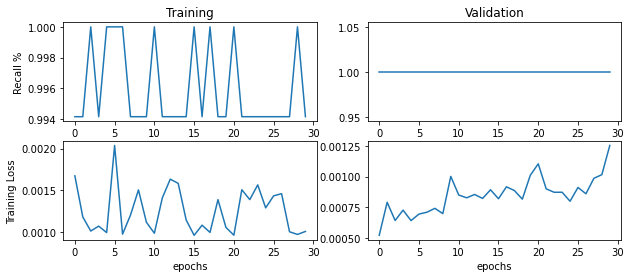

In [54]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['recall_6'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_recall_6'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

MLP has better performance than wide and deep network, as I predicted because our data column were not corrolated to each other, having wide branches increased complexity of network without adding useful information 

## Exceptional Work (1 points total)
( 7000 level students - options): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

To capture the embedding weights from the deep network, we need to extract the output of the embedding layers of the network. The embedding layers in Keras are typically defined as a separate layer that takes in the input data and converts each categorical feature to a dense vector representation. These dense vector representations are learned during training of the network.

Once we have extracted the embeddings for each observation, we can perform dimensionality reduction on the embeddings in order to visualize the results. Dimensionality reduction techniques such as Principal Component Analysis (PCA) can be used to reduce the high-dimensional embeddings into 2 or 3 dimensions that can be easily visualized in a scatterplot.

In [47]:
embedding_weights=[]
embed_layers=['gender_int_embed', 'hypertension_int_embed', 'heart_disease_int_embed', 'ever_married_int_embed', 'Residence_type_int_embed', 'smoking_status_int_embed','work_type_int_embed',]
for i in embed_layers:
    
    embedding_weights.append(model2.get_layer(i).get_weights()[0])

In [48]:
embedding_weights[0]

array([[-0.30111554],
       [ 0.4866578 ]], dtype=float32)

In [49]:
embedding_weights[5]

array([[ 0.03756297],
       [ 0.38410455],
       [-0.9321428 ]], dtype=float32)

In [50]:
embedding_weights[6]

array([[-0.1617189 , -0.76117045],
       [ 0.12319326, -0.08011832],
       [-0.11297473,  0.20581184],
       [ 0.8063617 , -0.11797812],
       [ 0.10101356, -0.08158413]], dtype=float32)

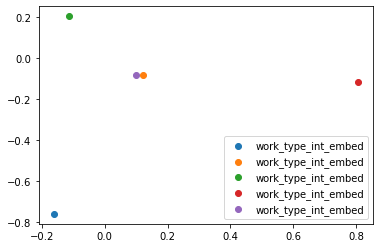

In [51]:
for i in range(len(embedding_weights[6])):
    plt.scatter(embedding_weights[6][i,0],embedding_weights[6][i,1], cmap='viridis',label=embed_layers[6])
plt.legend()

this graph shows the distance between work type options in the space, as it can be seen, two of them (never worked and childern) are so close to eachother due to similar properties of the data that cannot distinguished from eachother

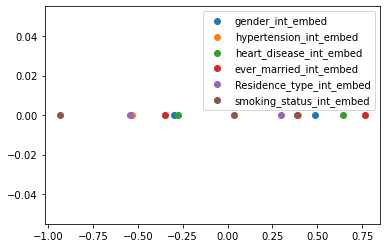

In [52]:

for j in range(len(embed_layers)-1):    
    plt.scatter( embedding_weights[j], [0] * embedding_weights[j].shape[0],label=embed_layers[j])
    plt.legend()

as most of our data columns are binary, they scatter in 1D dimension as it can be seen, our features are far enough from together that can be clustered separately

# Reference
[1] Dr. Larson's github <br>
[2] class lectures